# **Task 2: Simple Sales Forecasting with Moving Average**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

**lets load the data and make the data short as it is so much large**

In [5]:
df=pd.read_csv(r'c:\Users\HP\Desktop\train.csv')
print(df.head())

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0


In [6]:
print(df.dtypes)

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object


In [7]:
df['date']=pd.to_datetime(df['date'])
print(df['date'].dtype)

datetime64[ns]


In [8]:
df['week'] = df['date'].dt.isocalendar().week

In [9]:
print(df['week'].head())

0    1
1    1
2    1
3    1
4    1
Name: week, dtype: UInt32


In [10]:
df['month']=df['date'].dt.month


In [11]:
df['year']=df['date'].dt.year
print(df['year'].head())

0    2013
1    2013
2    2013
3    2013
4    2013
Name: year, dtype: int32


**Forecasting means:**  
**Using past behaviour to estimate likely future behaviour** 
* moving average is the **simplest honest forecast**

In real life data:  
* there are lots of noise, several spikes, driven by certain factors according to the field of data taken from.
* **Raw data doesn't show the trend correctly**  

**moving average :**  
* it tells if we ignore daily noise, what direction are we moving.  
* it smoothens the choas.

**time window**  
* how much past or time can we consider or trust to predict the future.

moving averages work on **one ordered sequence**  multiple stores/category mixed together results in meaningless trend  
**so lets dug deeper and select**  
* one store, one product family, one continuous date range.

In [ ]:
# now lets make a clear precise data for average rolling sales
data = df[(df['year'] == 2013) & (df['store_nbr'] == 1)].reset_index(drop=True)

new_family = ['FROZEN FOODS', 'EGGS']
data = data[(data['family'].isin(new_family))].reset_index(drop=True)
data = data.groupby('week', as_index=False)['sales'].mean().reset_index(drop=True).
print(data.head(50))

    week       sales
0      1  141.488436
1      2  109.481857
2      3  114.082143
3      4  102.792429
4      5  106.213143
5      6  103.575714
6      7   91.298857
7      8  108.554714
8      9  111.076786
9     10  113.210929
10    11  114.627571
11    12  123.050143
12    13  106.246071
13    14  137.142857
14    15  126.430857
15    16  128.379428
16    17  129.648857
17    18  114.000000
18    19  123.171000
19    20  122.310357
20    21   97.857143
21    22  126.298071
22    23  131.856857
23    24  132.053714
24    25  123.971357
25    26  124.857143
26    27  129.901857
27    28  129.293857
28    29  126.813286
29    30  123.176643
30    31  119.428571
31    32  111.896357
32    33  111.571429
33    34  111.372143
34    35  115.535071
35    36  124.018071
36    37  114.027143
37    38  122.500000
38    39  129.181286
39    40  125.785714
40    41  114.428571
41    42  121.535357
42    43  128.475857
43    44  124.390714
44    45  123.727143
45    46  129.828929
46    47  128

**now we have prepare the proper datset for the weekly rolling average of sales from the store_nbr 1 in the year 2013 for the family 'FROZEN FOODS' AND 'EGGS' and selected only the weeks and the average sales for them now lets visualize the chart and find the hidden patterns.**

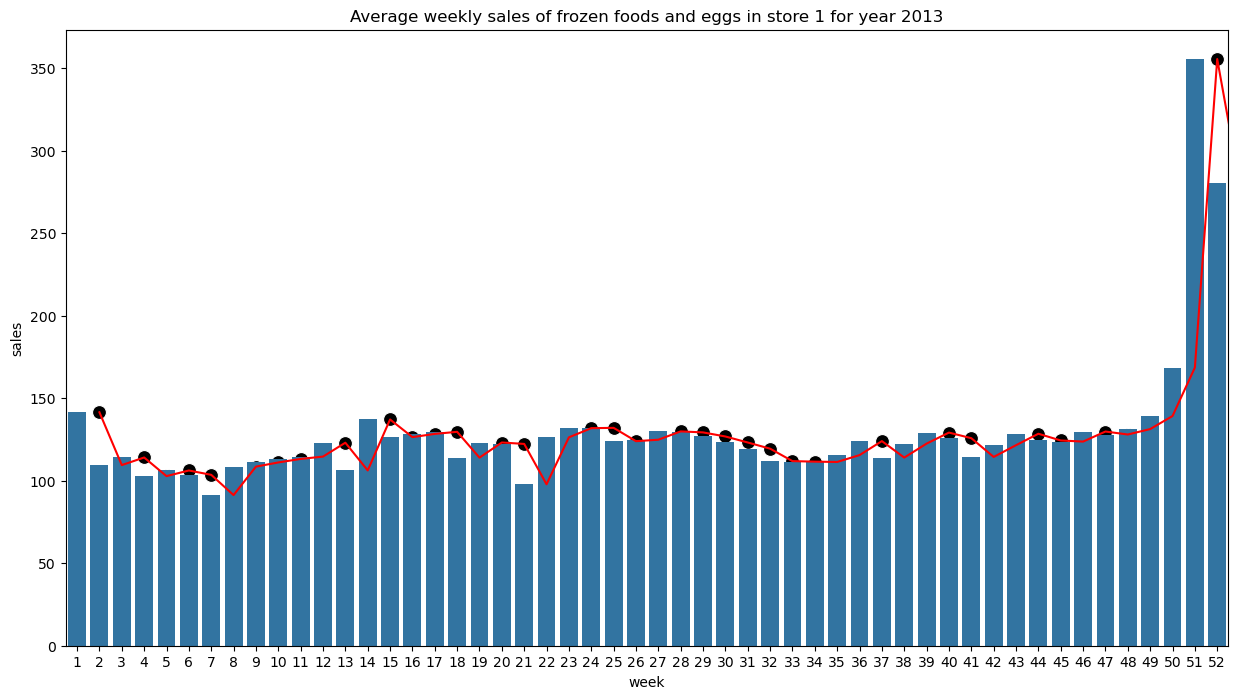

In [51]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data,x='week', y='sales', color='red')
sns.scatterplot(data=data, x='week', y='sales', color='black', s=100, marker='o')
sns.barplot(data=data, x='week', y='sales')
plt.title('Average weekly sales of frozen foods and eggs in store 1 for year 2013')
plt.show()

**now we can clearly see the average performance by the week for the frozen foods and eggs it has clearly reduce many noises and it shows much clear and exact trends.**

**lets draw it without rolling average**

In [54]:
data2 = df[(df['year'] == 2013) & (df['store_nbr'] == 1)].reset_index(drop=True)

new_family = ['FROZEN FOODS', 'EGGS']
data2 = data2[(data2['family'].isin(new_family))].reset_index(drop=True)
data2 = data2.drop(columns=['date', 'store_nbr', 'family', 'onpromotion', 'month', 'year', 'id'])
print(data2.head(20))

      sales  week
0     0.000     1
1     0.000     1
2   246.000     1
3   131.000     1
4   203.000     1
5    87.044     1
6   171.000     1
7    65.000     1
8   177.000     1
9    70.000     1
10   85.000     1
11   32.730     1
12  157.000     2
13   95.000     2
14  150.000     2
15   84.000     2
16  171.000     2
17   86.000     2
18  117.000     2
19   61.000     2


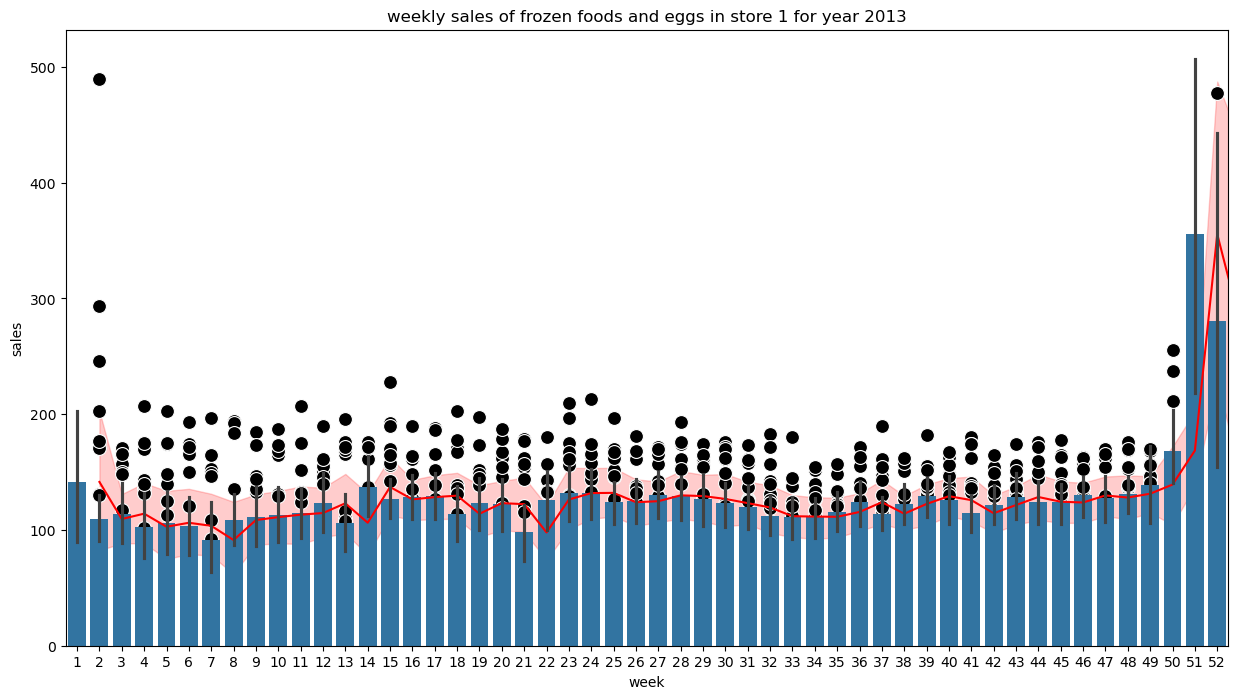

In [55]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data2,x='week', y='sales', color='red')
sns.scatterplot(data=data2, x='week', y='sales', color='black', s=100, marker='o')
sns.barplot(data=data2, x='week', y='sales')
plt.title('weekly sales of frozen foods and eggs in store 1 for year 2013')
plt.show()

**from compairing two different plots we can clearly see that there is a lot of scatterness and the real trend is much different than the overall individual raw trend**